## Import necessary libraries

In [1]:
import numpy as np                #For mathematical calculations
import pandas as pd               #for working with data
import matplotlib.pyplot as plt   #For plotting graphs
import seaborn as sns             #For data visualization
import warnings                   #For ignoring warnings
warnings.filterwarnings('ignore')

## Load csv data to Pandas dataframe and display the header.


In [2]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
# correlations among features
df.corr().round()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.0,0.0,-0.0,0.0,1.0,-0.0,1.0,0.0
Region,0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,0.0
Fresh,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0
Milk,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
Grocery,1.0,0.0,-0.0,1.0,1.0,-0.0,1.0,0.0
Frozen,-0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,0.0
Detergents_Paper,1.0,-0.0,-0.0,1.0,1.0,-0.0,1.0,0.0
Delicassen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
# univariate distributions skew
# Note: positive (right) or negative (left) skew, values closer to zero show less skew
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

## Data Visualization

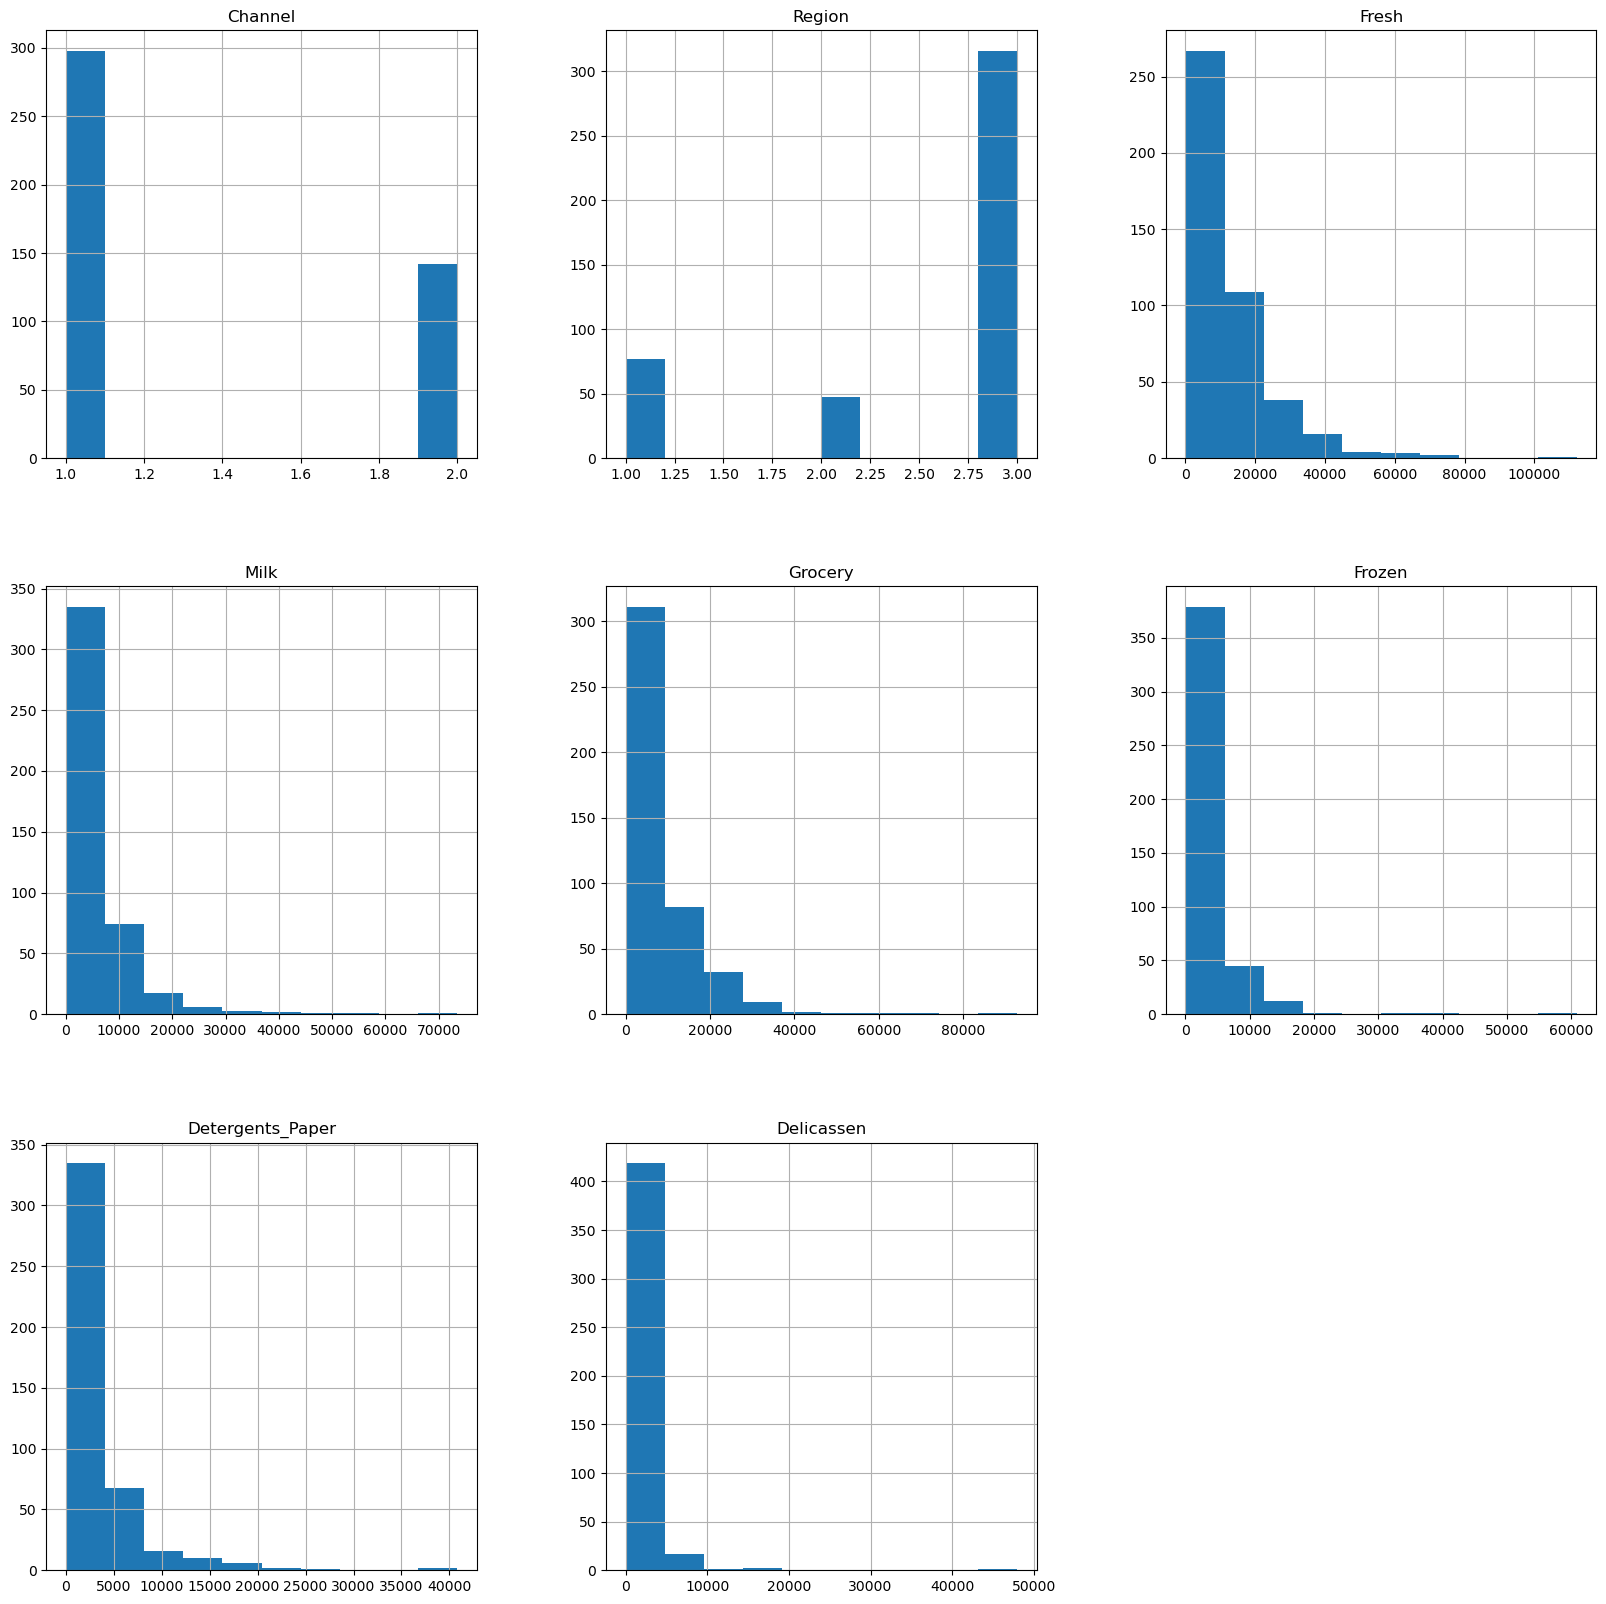

In [7]:
# histogram
df.hist(figsize=(20,20))
plt.show()

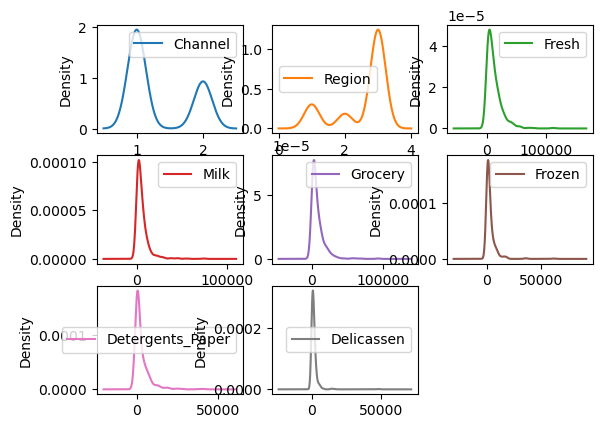

In [8]:
# density plots
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

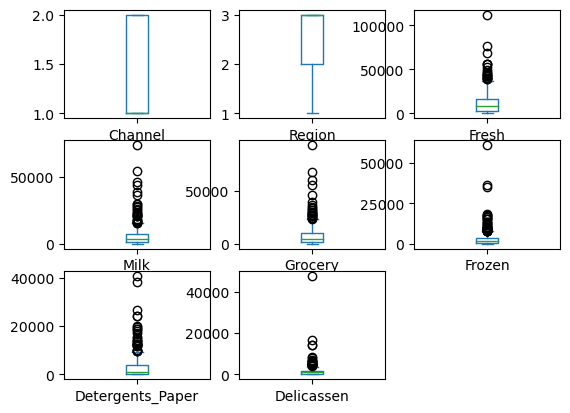

In [9]:
# box whisker plots (boxplots)
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

<Axes: >

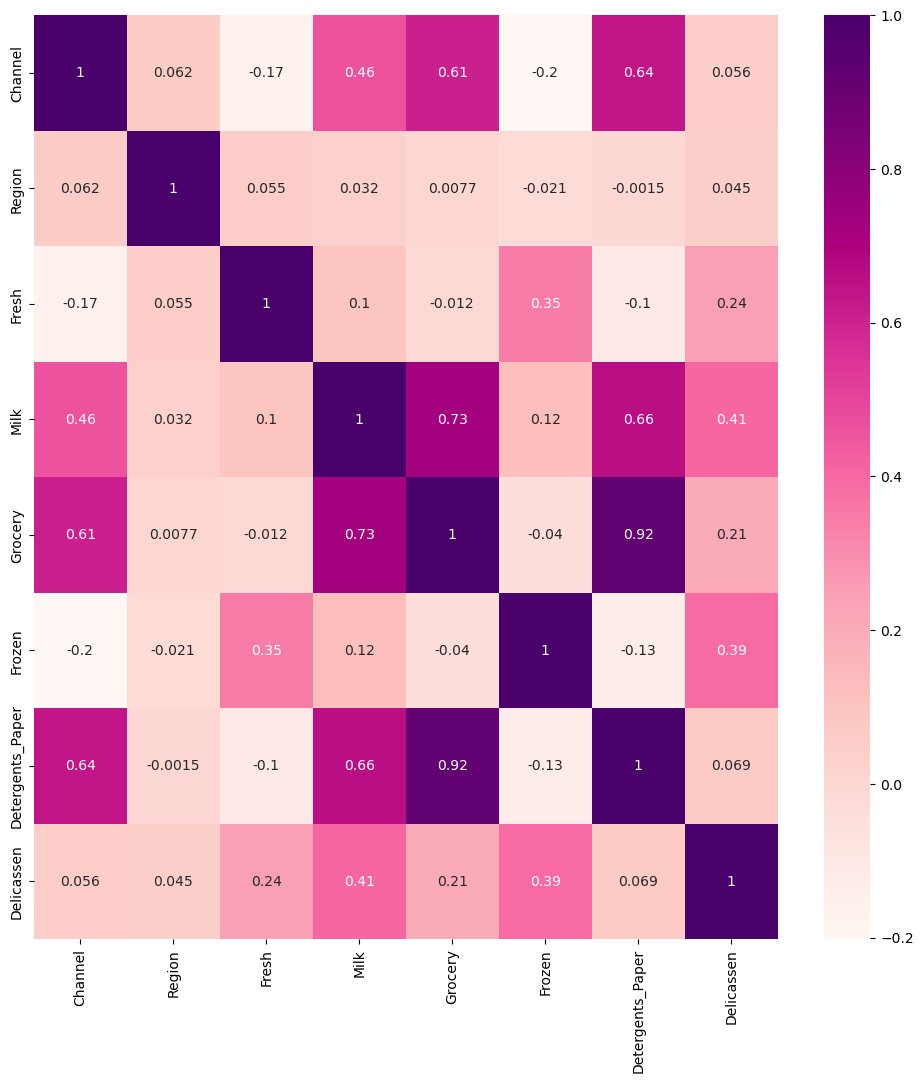

In [10]:
# correlation matrix plot
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdPu')

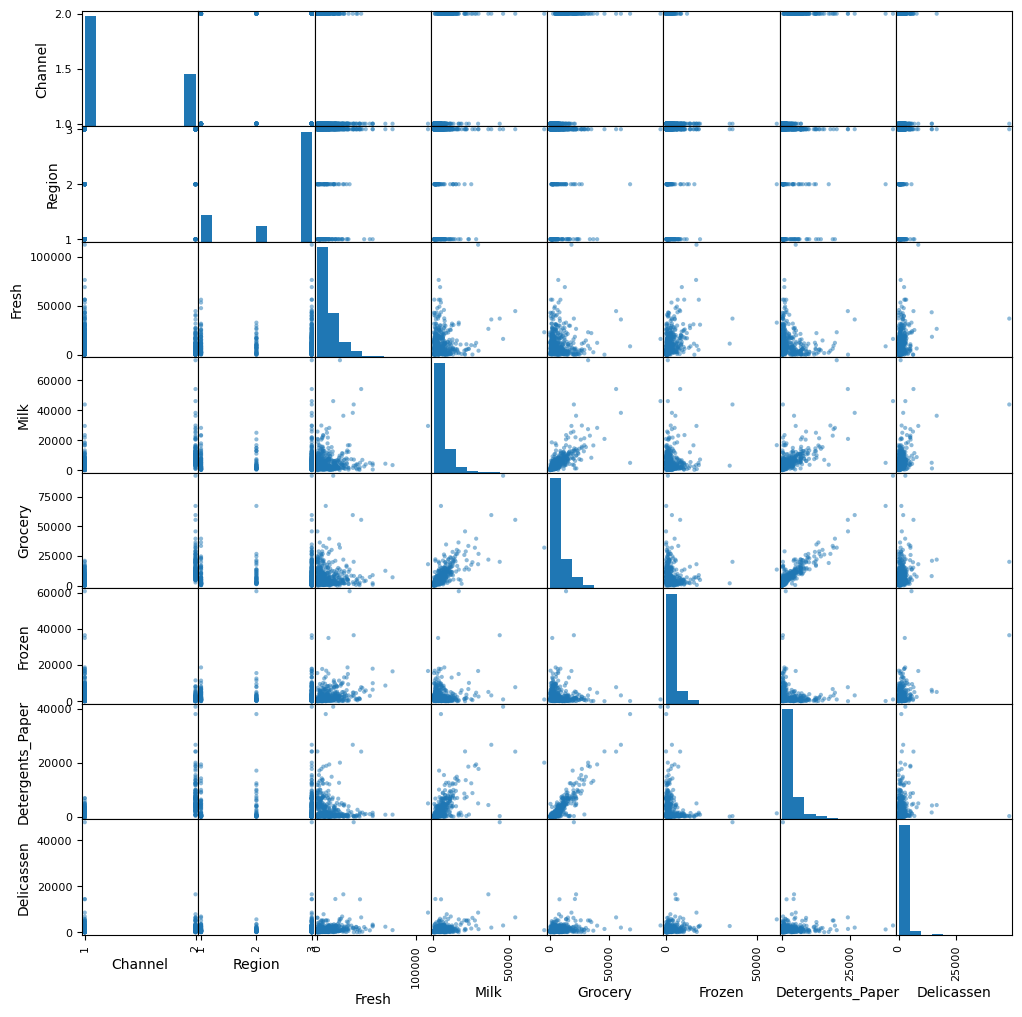

In [11]:
# scatter plot matrix
pd.plotting.scatter_matrix(df,figsize=(12,12))
plt.show()

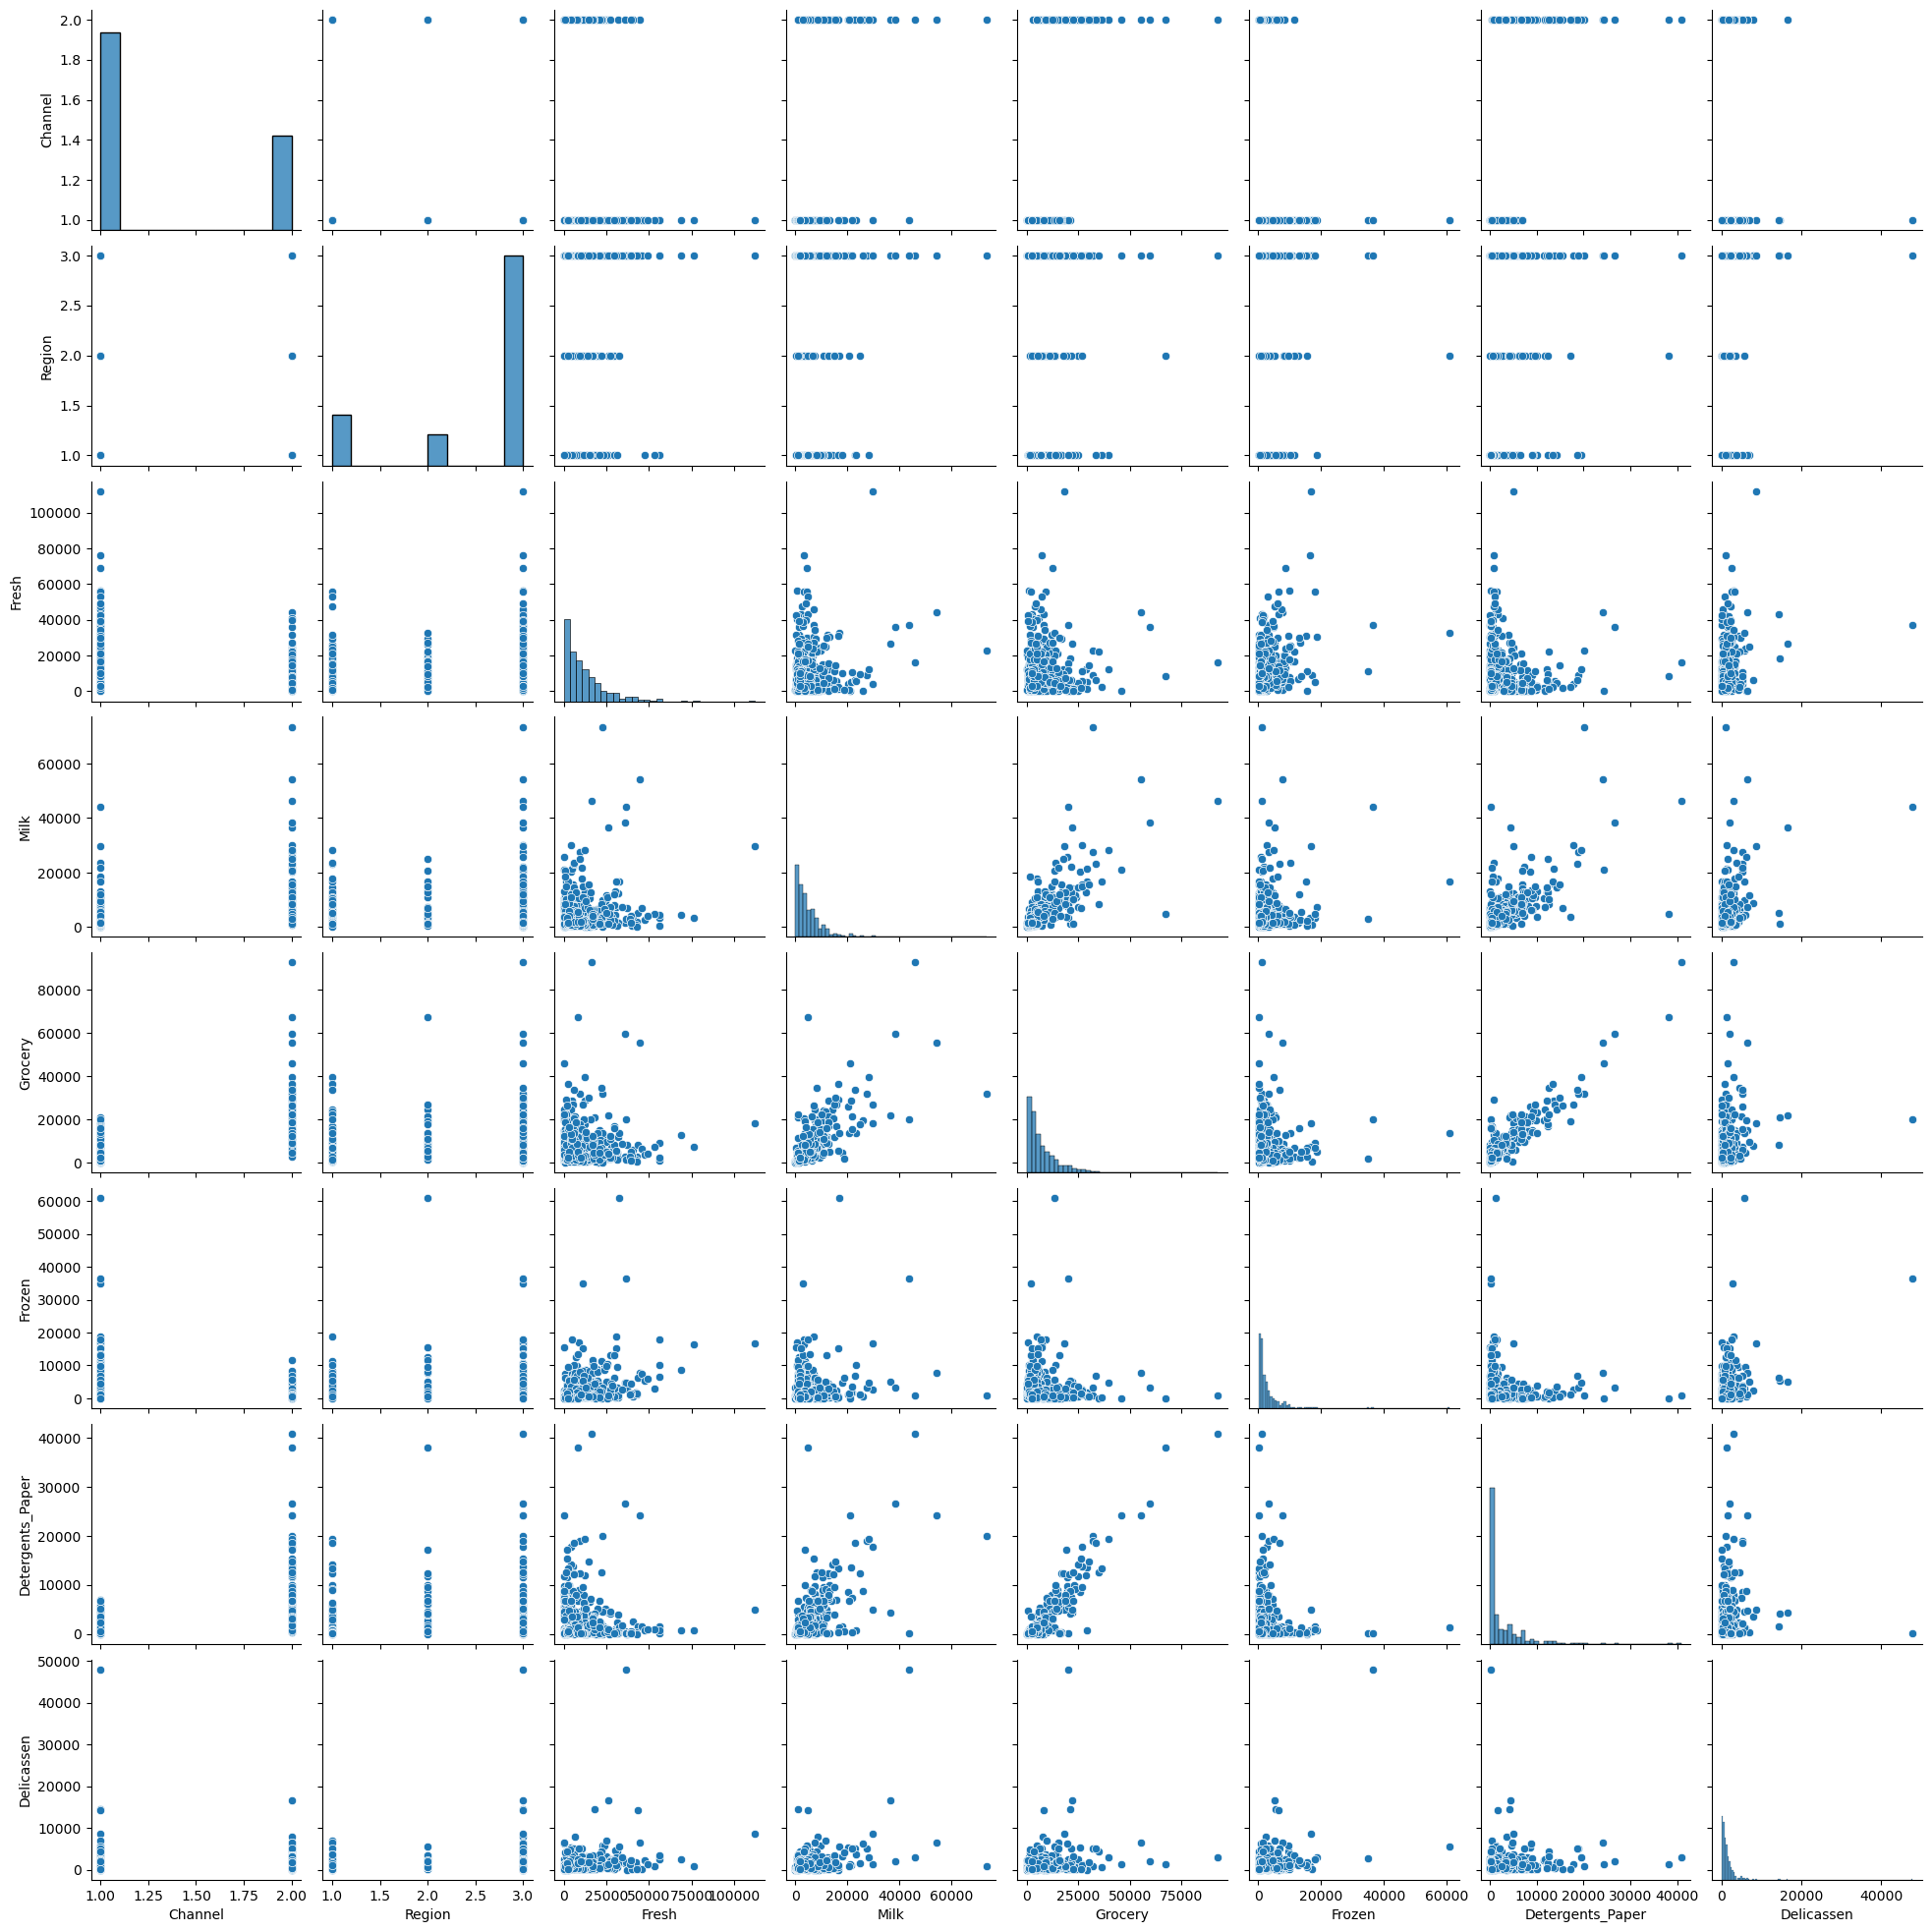

In [12]:
sns.pairplot(df)

## Data Preprocessing

In [13]:
# finding missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [14]:
#Removing Unuseful features for clustering
df.drop(['Channel', 'Region'],axis=1, inplace=True)

## Scaling Data Frame

In [15]:
#Log function to normalize features.
scaled_features = np.log(df)
Scaled_df= pd.DataFrame(scaled_features,index=df.index,columns=df.columns)
Scaled_df.sample(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
130,8.874728,7.794823,6.549651,8.750841,5.978886,6.814543
271,7.641564,8.518592,7.354362,7.021084,4.990433,7.346010
166,8.480944,8.812992,9.123693,6.900731,8.511779,8.198914
377,10.565995,8.056427,7.881560,6.941190,4.564348,7.124478
168,8.667164,6.599870,6.688355,7.239215,4.369448,6.061457
358,6.632002,9.834352,7.414573,8.718337,6.284134,8.318742
59,8.722091,8.586719,8.992184,4.859812,8.033983,7.379632
352,6.410175,7.008505,7.334982,6.721426,4.499810,5.273000
136,8.439232,9.057073,8.857942,8.428362,7.802618,7.340836
94,8.635154,9.410829,9.334591,5.327876,8.524764,5.497168


## Removing Outliers

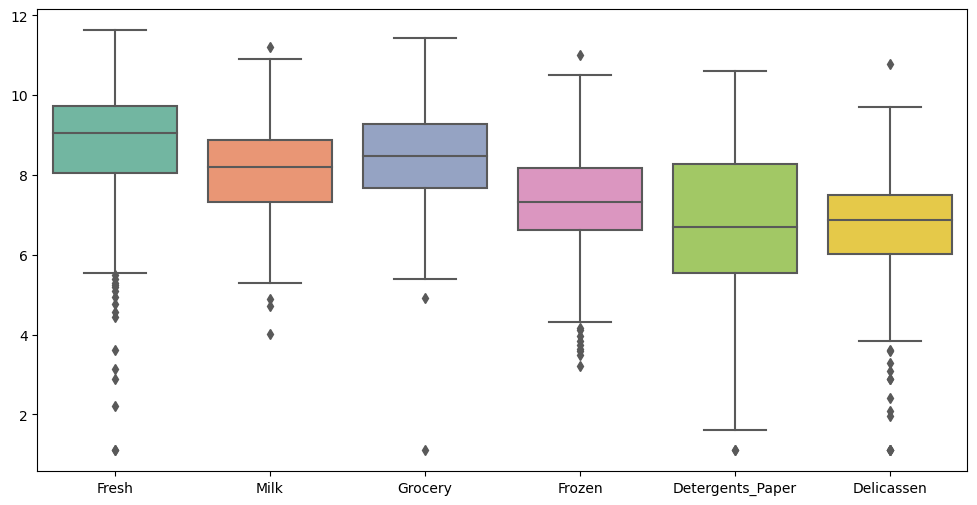

In [16]:
plt.figure(figsize = (12,6))
_ = sns.boxplot(data=Scaled_df, palette="Set2")

In [17]:
#Removing outliers using Quantile 0.25 and 0.75
for x in Scaled_df.keys():
    print(x)
    descr = Scaled_df[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    Scaled_df[x][Scaled_df[x]>upper_limit] = upper_limit
    Scaled_df[x][Scaled_df[x]<lower_limit] = lower_limit
    

Fresh
Milk
Grocery
Frozen
Detergents_Paper
Delicassen


In [18]:
Scaled_df.shape

(440, 6)

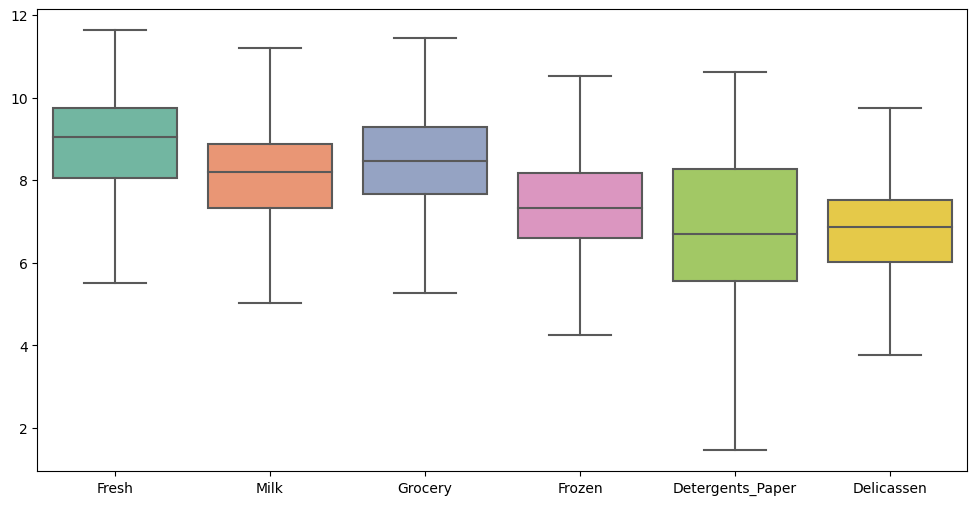

In [19]:
plt.figure(figsize = (12,6))
_ = sns.boxplot(data=Scaled_df, palette="Set2")

## Clustering

In [20]:
X =Scaled_df.iloc[:,[0,1,2,3,4,5]].values

In [21]:
# Step 2: Finding the Optimal clusters using KMeans, Silhouette Coefficient Score for both KMeans and Agglomerative Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score
wcss = []
sil_kmeans = []
sil_agc = []

for i in range(3,9):
     # K-Means Clustering:
    km = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 1)
    km.fit(X)
    
     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = km.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X, km.labels_)
    sil_kmeans.append(sil_km)
    
    # Agglomerative Clusters and its Silhouette Score
    agc = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'ward')
    agc.fit(X)
    sil_ag = silhouette_score(X, agc.labels_)
    sil_agc.append(sil_ag)
    
    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print('Silhouette Score for AGC(HCA):', sil_ag)
    print()

Number of clusters: 3
KMeans Inertia 2427.788383550678
Silhouette Score for KMeans: 0.21170813065567118
Silhouette Score for AGC(HCA): 0.19783980035665832

Number of clusters: 4
KMeans Inertia 2138.9125412131075
Silhouette Score for KMeans: 0.19218500477070988
Silhouette Score for AGC(HCA): 0.1860403975744404

Number of clusters: 5
KMeans Inertia 1947.6195577683452
Silhouette Score for KMeans: 0.1992847111261844
Silhouette Score for AGC(HCA): 0.17834611134209766

Number of clusters: 6
KMeans Inertia 1786.9905534646919
Silhouette Score for KMeans: 0.20763432504715065
Silhouette Score for AGC(HCA): 0.1583313896339598

Number of clusters: 7
KMeans Inertia 1674.7800729651435
Silhouette Score for KMeans: 0.20422796243957267
Silhouette Score for AGC(HCA): 0.16037692695749814

Number of clusters: 8
KMeans Inertia 1578.2881612668457
Silhouette Score for KMeans: 0.19098702461051706
Silhouette Score for AGC(HCA): 0.15319729874676327



In [22]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init = 100)
    kmeans.fit(X)
    css = kmeans.inertia_
    wcss.append(css)

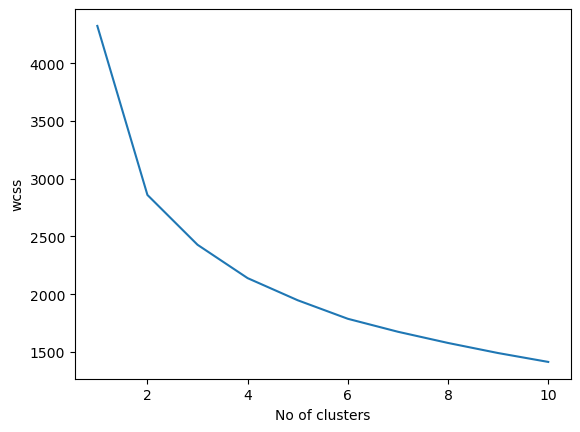

In [23]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
#from elbow method 3 is the optimum no of clusters
kmeans  = KMeans(n_clusters = 3, n_init = 100)
kmeans.fit(X)
y_kmeans  = kmeans.predict(X)
y_kmeans

array([0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1,
       2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0,

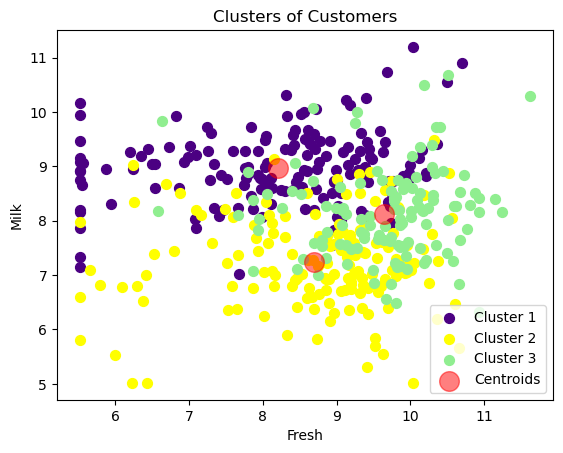

In [25]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=50, c='indigo', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=50, c='yellow', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=50, c='lightgreen', label ='Cluster 3')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='Red',alpha=0.5, label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()

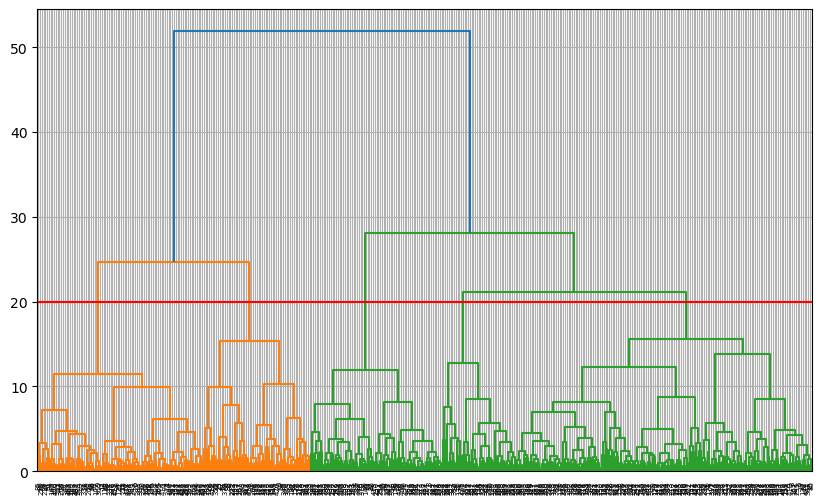

In [26]:
from scipy.cluster.hierarchy import linkage

from scipy.cluster.hierarchy import dendrogram 

from scipy.cluster.hierarchy import fcluster

mergings = linkage(X,method = 'ward')

plt.figure(figsize=(10,6))

dendrogram(mergings)

plt.axhline(20,color='red')

plt.grid()

plt.show()

## Dimension Reduction Using PCA

In [27]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
data = pd.DataFrame(Scaled_df,index=Scaled_df.index,columns=Scaled_df.columns)

In [28]:
pca = PCA()
pc_array = pca.fit_transform(data)
pc_array.shape

(440, 6)

In [29]:
pc_array = pd.DataFrame(pc_array,columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])

In [30]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.758328,0.228396,-0.933750,1.667740,0.181320,-0.432018
1,-1.809206,-0.788661,0.222960,0.074972,0.089215,-0.217835
2,-1.891805,-1.594703,1.204693,0.639626,-0.565240,-0.321329
3,1.119625,-1.469805,0.378186,-0.400994,-0.714575,0.633059
4,-0.822458,-2.365309,0.296733,0.476189,-0.431332,0.028020
...,...,...,...,...,...,...
435,0.586168,-2.974264,0.563978,-0.202192,1.882090,0.740330
436,3.156712,-1.935415,0.066058,0.713493,-0.368415,-0.540123
437,-3.769852,-0.660174,-1.002425,0.949868,0.012510,0.148783
438,1.676197,-0.356754,0.438769,1.311213,-0.075817,0.005351


In [31]:
pc_array.corr().round()

,pc1,pc2,pc3,pc4,pc5,pc6
pc1,1.0,-0.0,0.0,-0.0,0.0,-0.0
pc2,-0.0,1.0,0.0,-0.0,0.0,-0.0
pc3,0.0,0.0,1.0,0.0,-0.0,0.0
pc4,-0.0,-0.0,0.0,1.0,0.0,-0.0
pc5,0.0,0.0,-0.0,0.0,1.0,0.0
pc6,-0.0,-0.0,0.0,-0.0,0.0,1.0


In [32]:
pca.explained_variance_

array([4.69920028, 2.55673447, 0.9897845 , 0.91794952, 0.46987782,
       0.21259878])

In [33]:
pca.explained_variance_ratio_*100

array([47.72629392, 25.96685682, 10.05250751,  9.32293279,  4.77220076,
        2.15920819])

In [34]:
print(np.cumsum(pca.explained_variance_ratio_)*100)

[ 47.72629392  73.69315074  83.74565825  93.06859104  97.84079181
 100.        ]


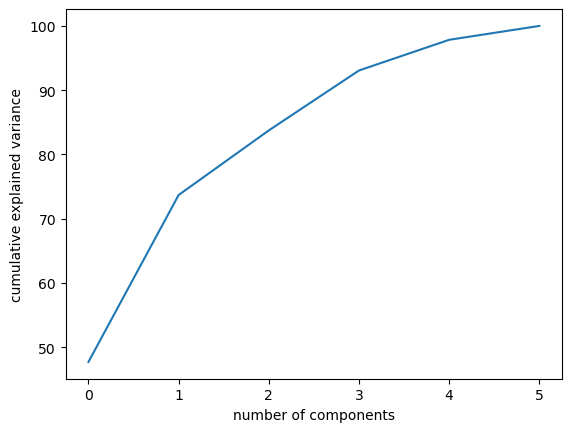

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [36]:
pca1 = PCA(n_components=4)
pc_array1 = pca1.fit_transform(data)
pc_array1 = pd.DataFrame(pc_array1,columns = ['pc1','pc2','pc3','pc4'])
pc_array1

,pc1,pc2,pc3,pc4
0,-1.758328,0.228396,-0.933750,1.667740
1,-1.809206,-0.788661,0.222960,0.074972
2,-1.891805,-1.594703,1.204693,0.639626
3,1.119625,-1.469805,0.378186,-0.400994
4,-0.822458,-2.365309,0.296733,0.476189
...,...,...,...,...
435,0.586168,-2.974264,0.563978,-0.202192
436,3.156712,-1.935415,0.066058,0.713493
437,-3.769852,-0.660174,-1.002425,0.949868
438,1.676197,-0.356754,0.438769,1.311213


In [37]:
pca1.explained_variance_

array([4.69920028, 2.55673447, 0.9897845 , 0.91794952])

In [38]:
pca1.explained_variance_ratio_*100

array([47.72629392, 25.96685682, 10.05250751,  9.32293279])

In [39]:
print(np.cumsum(pca1.explained_variance_ratio_)*100)

[47.72629392 73.69315074 83.74565825 93.06859104]


In [40]:
pca2 = PCA(n_components=3)
pc_array2 = pca2.fit_transform(data)
pc_array2 = pd.DataFrame(pc_array2,columns = ['pc1','pc2','pc3'])
pc_array2

,pc1,pc2,pc3
0,-1.758328,0.228396,-0.933750
1,-1.809206,-0.788661,0.222960
2,-1.891805,-1.594703,1.204693
3,1.119625,-1.469805,0.378186
4,-0.822458,-2.365309,0.296733
...,...,...,...
435,0.586168,-2.974264,0.563978
436,3.156712,-1.935415,0.066058
437,-3.769852,-0.660174,-1.002425
438,1.676197,-0.356754,0.438769


In [41]:
pca2.explained_variance_

array([4.69920028, 2.55673447, 0.9897845 ])

In [42]:
pca2.explained_variance_ratio_*100

array([47.72629392, 25.96685682, 10.05250751])

In [43]:
print(np.cumsum(pca2.explained_variance_ratio_)*100)

[47.72629392 73.69315074 83.74565825]


## Clustering after Dimension Reduction Using PCA

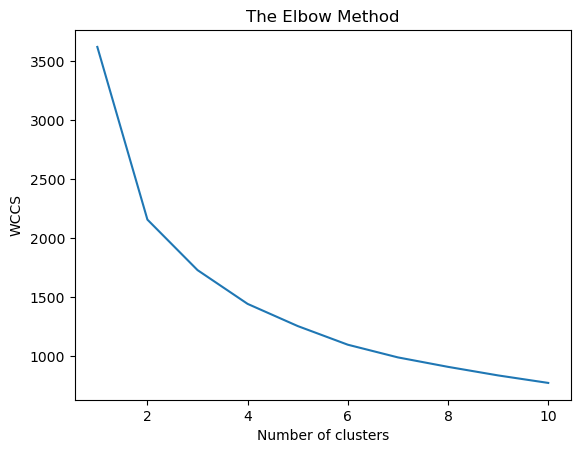

In [44]:
#Finding the Optimal clusters using KMeans
reduced_data =pc_array2.iloc[:,[0,1,2]].values
wccs =[] #emplty list
for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans1.fit(reduced_data)                       
    wccs.append(kmeans1.inertia_) 
plt.plot(range(1,11), wccs)       
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCCS')
plt.show()

In [45]:
kmeans1 = KMeans(n_clusters = 3, init='k-means++', random_state=1)
y_kmeans1 = kmeans1.fit_predict(reduced_data)

In [46]:
y_kmeans1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2,
       1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0,
       0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0,

In [47]:
sil_avg1 = silhouette_score(reduced_data,y_kmeans1)
sil_avg1 

0.2731245089904171

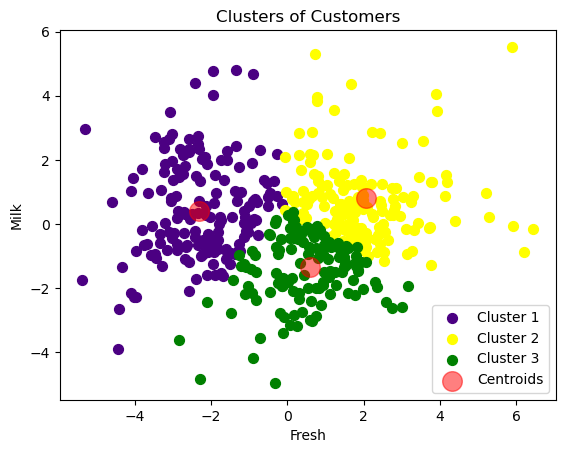

In [48]:
plt.scatter(reduced_data[y_kmeans==0, 0], reduced_data[y_kmeans==0, 1], s=50, c='indigo', label ='Cluster 1')
plt.scatter(reduced_data[y_kmeans==1, 0], reduced_data[y_kmeans==1, 1], s=50, c='yellow', label ='Cluster 2')
plt.scatter(reduced_data[y_kmeans==2, 0], reduced_data[y_kmeans==2, 1], s=50, c='green', label ='Cluster 3')


plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=200, c='Red',alpha=0.5, label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()


 ## Agglomerative Clustering after Dimension Reduction Using PCA

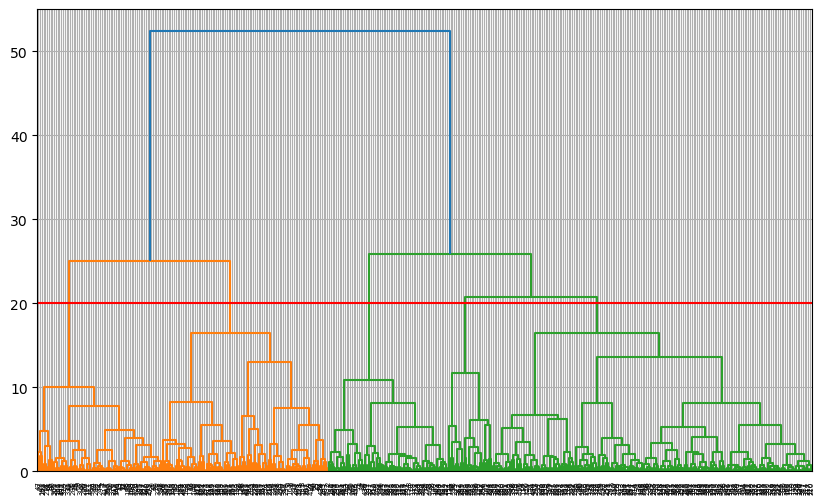

In [49]:
mergings1 = linkage(reduced_data,method = 'ward')

plt.figure(figsize=(10,6))

dendrogram(mergings1)

plt.axhline(20,color='red')

plt.grid()

plt.show()

For n_clusters=2, Silhouette Coefficient = 0.35692020453376677
For n_clusters=3, Silhouette Coefficient = 0.25170582320511037
For n_clusters=4, Silhouette Coefficient = 0.2296576795967086
For n_clusters=5, Silhouette Coefficient = 0.2415464109030976
For n_clusters=6, Silhouette Coefficient = 0.23522502748507823
For n_clusters=7, Silhouette Coefficient = 0.24331551256197162
For n_clusters=8, Silhouette Coefficient = 0.2281472589567562
For n_clusters=9, Silhouette Coefficient = 0.24019212416689714
For n_clusters=10, Silhouette Coefficient = 0.24747933045449375


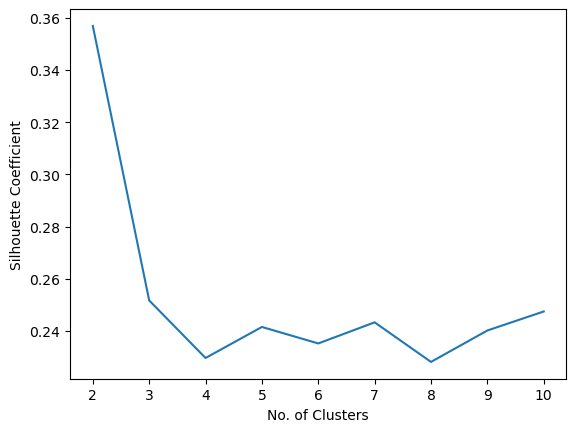

In [50]:
#Silhouette Coefficient Score for Agglomerative Clustering
k_clusters = []
sil_coeffecients = []

for n_cluster in range(2,11):
    agc1  = AgglomerativeClustering(n_clusters = n_cluster).fit(reduced_data)
    label = agc1.labels_
    sil_ag1 = silhouette_score(reduced_data, label)
    print("For n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_ag1))
    sil_coeffecients.append(sil_ag1)
    k_clusters.append(n_cluster)

plt.plot(k_clusters, sil_coeffecients)
plt.ylabel('Silhouette Coefficient'), plt.xlabel('No. of Clusters')
plt.show()

In [51]:
hc1 = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean',linkage = 'ward')
y_hc1 = hc1.fit_predict(reduced_data)

In [52]:
silhouette = silhouette_score(reduced_data,y_hc1)
print(silhouette)

0.35692020453376677
